In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

## Load data
---

We'll use [Yahoo! Finance](https://finance.yahoo.com/quote/AAPL) to get a few years worth of stock prices from Apple, Inc. (AAPL)

In [2]:
# Load data
stocks = pd.read_csv('datasets/AAPL.csv')
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-10,187.740005,190.369995,187.649994,190.039993,184.272324,27989300
1,2018-05-11,189.490005,190.059998,187.449997,188.589996,183.571487,26212200
2,2018-05-14,189.009995,189.529999,187.860001,188.149994,183.143204,20778800
3,2018-05-15,186.779999,187.070007,185.100006,186.440002,181.478729,23695200
4,2018-05-16,186.070007,188.460007,186.000000,188.179993,183.172379,19183100


In [3]:
# Change date column to be datetime dtype
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

## Set the `Date` column to be the index
---

We'll be exploring a few `pandas` methods related to time series data. In order for them to work we need to set the `Date` column to be the index.

In [4]:
# Set Date to be in the index
stocks.set_index('Date', inplace=True)

In [13]:
# Sort the index
stocks.sort_index(inplace=True)

## Explore the data
---

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `Adj Close`: The closing price, when accounting for dividend payments, stock splits, etc.
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

In [6]:
stocks.loc['2018']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,187.740005,190.369995,187.649994,190.039993,184.272324,27989300
2018-05-11,189.490005,190.059998,187.449997,188.589996,183.571487,26212200
2018-05-14,189.009995,189.529999,187.860001,188.149994,183.143204,20778800
2018-05-15,186.779999,187.070007,185.100006,186.440002,181.478729,23695200
2018-05-16,186.070007,188.460007,186.000000,188.179993,183.172379,19183100
...,...,...,...,...,...,...
2018-12-24,148.149994,151.550003,146.589996,146.830002,143.924454,37169200
2018-12-26,148.300003,157.229996,146.720001,157.169998,154.059814,58582500
2018-12-27,155.839996,156.770004,150.070007,156.149994,153.059998,53117100


## Filtering by dates
---

Now that our `Date` column is the index, we can filter our data in unique ways. Try `stocks.loc['2018']` in the cell below:

In [7]:
stocks.loc['January 2019': 'June 2019']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300
...,...,...,...,...,...,...
2019-06-24,198.539993,200.160004,198.169998,198.580002,196.237991,18220400
2019-06-25,198.429993,199.259995,195.289993,195.570007,193.263504,21070300
2019-06-26,197.770004,200.990005,197.350006,199.800003,197.443619,26067500


You can also filter by month:

## Resampling
---

`stocks.resample()` is similar to `stocks.groupby()`, but with dates instead of categories.

In [11]:
stocks.resample('M').mean() #Monthly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-31,187.770002,188.822000,186.643333,187.789998,182.745411,2.110217e+07
2018-06-30,188.720477,189.831906,187.419047,188.621429,183.602084,2.512498e+07
2018-07-31,190.196190,191.540000,189.014760,190.311429,185.247115,1.874721e+07
2018-08-31,212.486957,214.561304,211.305652,213.346089,208.182025,3.044865e+07
2018-09-30,222.331053,224.530526,220.077895,222.073685,216.922273,3.573537e+07
2018-10-31,221.200001,223.940871,217.874347,220.845652,215.722724,3.433689e+07
2018-11-30,191.819523,193.949523,188.700475,191.235714,187.281813,4.577745e+07
2018-12-31,165.243158,167.320001,161.891054,164.266317,161.015709,4.731171e+07
2019-01-31,153.608571,155.530478,151.947619,154.166190,151.115453,3.943273e+07


In [12]:
stocks.resample('W').mean() # Weekly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-13,188.615005,190.214996,187.549995,189.314995,183.921905,27100750.0
2018-05-20,187.410001,188.356003,186.290003,187.213998,182.232108,19849760.0
2018-05-27,187.946002,189.028000,186.662000,187.976001,182.973837,18878980.0
2018-06-03,187.632503,188.809998,186.884998,188.127499,183.121300,23032475.0
2018-06-10,192.730002,193.528000,191.548001,192.856000,187.723972,23353960.0
...,...,...,...,...,...,...
2020-04-12,263.284996,268.062500,258.577507,263.989998,263.277313,45982450.0
2020-04-19,280.556000,284.686005,276.743994,282.843994,282.080420,41477360.0
2020-04-26,276.182001,280.317999,273.270001,275.879999,275.135211,33969360.0


## Lookup challenge
---

Where can you find all the resample options?

Answer: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

## Rolling
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of methods for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` method with a statistical function chained to it. 

In [14]:
stocks.rolling(3).mean() #the mean of every 3 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,188.746668,189.986664,187.653331,188.926661,183.662338,2.499343e+07
2018-05-15,188.426666,188.886668,186.803335,187.726664,182.731140,2.356207e+07
2018-05-16,187.286667,188.353338,186.320002,187.589996,182.598104,2.121903e+07
...,...,...,...,...,...,...
2020-05-04,288.460001,295.740000,286.840006,292.010000,291.221670,4.643740e+07
2020-05-05,290.160004,297.896667,288.876668,293.263336,292.471619,4.349467e+07
2020-05-06,294.896667,299.309997,293.216664,297.116669,296.314545,3.530440e+07


In [15]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,187.740005,190.369995,187.649994,190.039993,184.272324,27989300
2018-05-11,189.490005,190.059998,187.449997,188.589996,183.571487,26212200
2018-05-14,189.009995,189.529999,187.860001,188.149994,183.143204,20778800
2018-05-15,186.779999,187.070007,185.100006,186.440002,181.478729,23695200
2018-05-16,186.070007,188.460007,186.000000,188.179993,183.172379,19183100


## Challenge
---

Plot a line chart with two lines:
1. The `Open` price
2. The 30 day rolling mean of the `Open` price

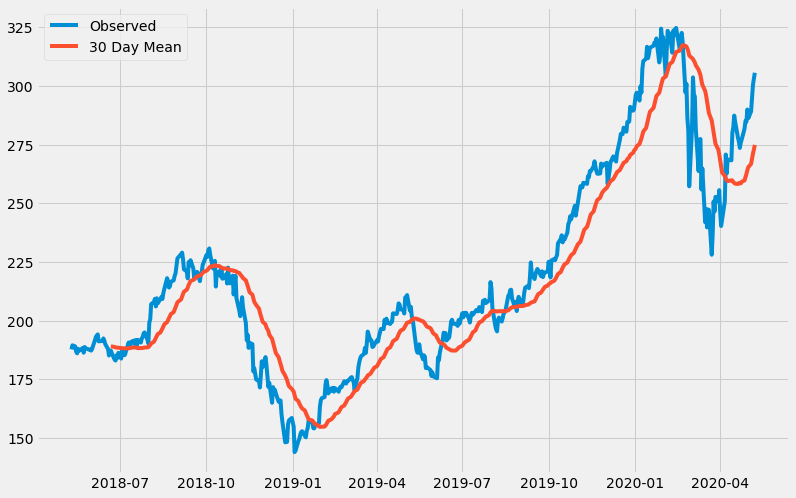

In [21]:
# Class answer
plt.figure(figsize = (12,8))
plt.plot(stocks['Open'],label = 'Observed')
plt.plot(stocks['Open'].rolling(30).mean(), label = '30 Day Mean')
plt.ylabel = ('Open Price')
plt.legend();

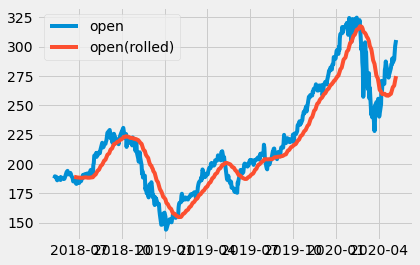

In [18]:
x = stocks['Open']
y = stocks['Open'].rolling(30).mean()
  
# plot lines
plt.plot(x, label = "open")
plt.plot(y, label = "open(rolled)")
plt.legend()
plt.show()

## `.diff()`
---
The `.diff()` calculates the difference in a value between a value at time $T$ and that same value at $T-1$. For example, if I have a dataframe of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

When I call `.diff()`, I get the following:
<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>10</td>
    </tr>
  </tbody>
</table>
<div style="clear: both;"></div>


In [23]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,187.740005,190.369995,187.649994,190.039993,184.272324,27989300
2018-05-11,189.490005,190.059998,187.449997,188.589996,183.571487,26212200
2018-05-14,189.009995,189.529999,187.860001,188.149994,183.143204,20778800
2018-05-15,186.779999,187.070007,185.100006,186.440002,181.478729,23695200
2018-05-16,186.070007,188.460007,186.000000,188.179993,183.172379,19183100


In [24]:
stocks.diff()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,1.750000,-0.309997,-0.199997,-1.449997,-0.700837,-1777100.0
2018-05-14,-0.480010,-0.529999,0.410004,-0.440002,-0.428283,-5433400.0
2018-05-15,-2.229996,-2.459992,-2.759995,-1.709992,-1.664475,2916400.0
2018-05-16,-0.709992,1.390000,0.899994,1.739991,1.693650,-4512100.0
...,...,...,...,...,...,...
2020-05-04,2.920013,-5.309998,0.470001,4.089997,4.078949,-26762200.0
2020-05-05,5.889985,7.309998,8.139984,4.399994,4.388122,3545800.0
2020-05-06,5.399993,2.239990,4.410004,3.070007,3.061707,-1354400.0


## `.pct_change()` 
---

`.pct_change()` works similar to `.diff()`, except we're calculating the difference as a change in percentage: $X_{t}/X_{t-1} - 1$

So if I have my table of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

The `.pct_change()` will look like this:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>.1</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>


We'd interpret 1-2-2019 as a 10% increase (110/100 - 1 = .10) in price from the day before. Again, the first row is a `NaN` since there is no prior row to calcuate the percent change from.

In [25]:
stocks.pct_change().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,0.009321,-0.001628,-0.001066,-0.007630,-0.003803,-0.063492
2018-05-14,-0.002533,-0.002789,0.002187,-0.002333,-0.002333,-0.207285
2018-05-15,-0.011798,-0.012979,-0.014692,-0.009088,-0.009088,0.140355
2018-05-16,-0.003801,0.007430,0.004862,0.009333,0.009332,-0.190423


## Challenge
---

Create three **separate** plots:
1. One for the `Close` price
2. One for the `Close` price, using `.diff()`
3. One for the `Close` price as a percent change.

What happens to your overall data when you diff?

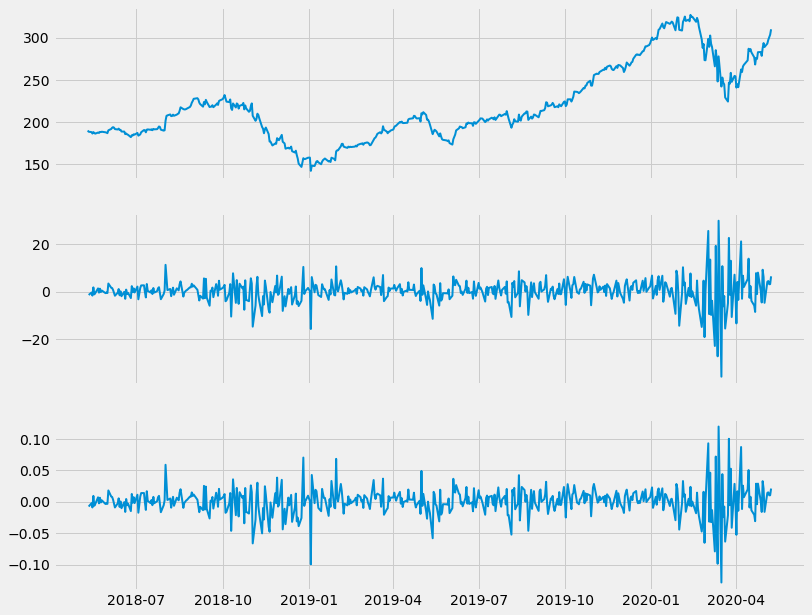

In [35]:
# Class Notes
fig, axes = plt.subplots(nrows=3, figsize =(12,10), sharex=True)
axes[0].plot(stocks['Close'],lw=2)
axes[1].plot(stocks['Close'].diff(),lw=2)
axes[2].plot(stocks['Close'].pct_change(), lw=2);

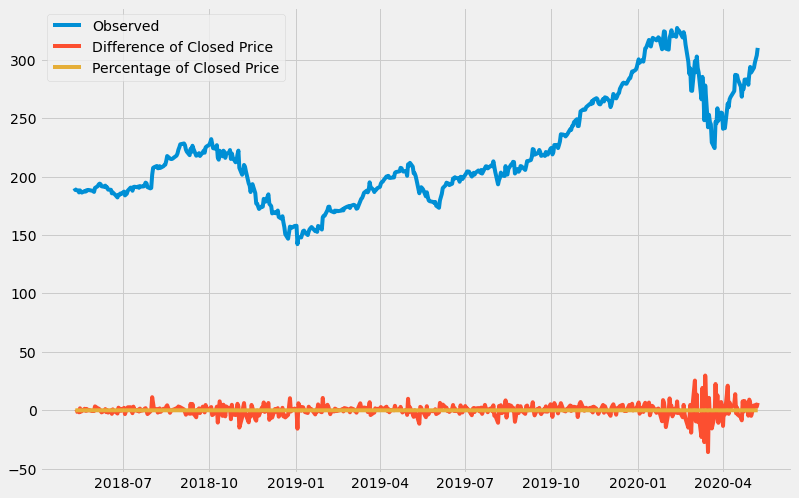

In [27]:
plt.figure(figsize = (12,8))
plt.plot(stocks['Close'],label = 'Observed')
plt.plot(stocks['Close'].diff(), label = 'Difference of Closed Price')
plt.plot(stocks['Close'].pct_change(), label = 'Percentage of Closed Price')
plt.ylabel = ('Closed Price')
plt.legend();

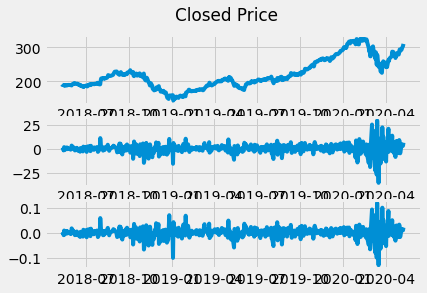

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Closed Price')
ax1.plot(stocks['Close'],label = 'Observed')
ax2.plot(stocks['Close'].diff(), label = 'Difference of Closed Price')
ax3.plot(stocks['Close'].pct_change(), label = 'Percentage of Closed Price')

[Why would we find the difference?](https://otexts.com/fpp2/stationarity.html) Well, there is one assumption that is **required** for nearly every time series model: **stationarity**.
- If our time series is stationary, then we do not need to difference
- If our time series is not stationary, then we difference either once (`stocks.diff()`) or twice (`stocks.diff().diff()`). Differenced data often is stationary, so we difference our data, then model that!

## What is stationarity?
---

Informally, stationarity means that there **aren't systematic changes in our time series over time**.
- Our mean stays the same. (There is no trend.)
- The autocorrelation between $Y_t$ and $Y_{t-k}$ depends only on the size of our lag $k$. (There is no seasonality.)
- A [white noise process](https://stats.stackexchange.com/questions/7070/what-is-a-white-noise-process) is a common example of a stationary time series.

The problem is, many time series **aren't** stationary.
- The amount that stock prices vary on a day-to-day basis aren't going to be the same.
- Stock prices may increase or decrease over time; assuming a constant mean here doesn't make sense.


## Shifting
---

`stocks.shift()` is used to bring values from previous dates forward in time.

In [36]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,187.740005,190.369995,187.649994,190.039993,184.272324,27989300
2018-05-11,189.490005,190.059998,187.449997,188.589996,183.571487,26212200
2018-05-14,189.009995,189.529999,187.860001,188.149994,183.143204,20778800
2018-05-15,186.779999,187.070007,185.100006,186.440002,181.478729,23695200
2018-05-16,186.070007,188.460007,186.000000,188.179993,183.172379,19183100


In [38]:
stocks.shift() #Values from the previous day

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,187.740005,190.369995,187.649994,190.039993,184.272324,27989300.0
2018-05-14,189.490005,190.059998,187.449997,188.589996,183.571487,26212200.0
2018-05-15,189.009995,189.529999,187.860001,188.149994,183.143204,20778800.0
2018-05-16,186.779999,187.070007,185.100006,186.440002,181.478729,23695200.0
...,...,...,...,...,...,...
2020-05-04,286.250000,299.000000,285.850006,289.070007,288.289612,60154200.0
2020-05-05,289.170013,293.690002,286.320007,293.160004,292.368561,33392000.0
2020-05-06,295.059998,301.000000,294.459991,297.559998,296.756683,36937800.0


## Creating a simple dataset
---

Let's create a simple dataset that tries to predict today's `Close` price using yesterday's `Close` price with today's `Open` price. 

**NOTE:** Remember we want stationarity!

In [39]:
# create new df with just open and close prices
stocks_new = stocks[['Open','Close']].copy()
# create a column with yesterday's close price

# convert to percentage change from previous day (make sure it's stationary)

# convert target into a categorical value (did close go up or down)

# drop rows with missing values

stocks_new

,Open,Close
Date,,
2018-05-10,187.740005,190.039993
2018-05-11,189.490005,188.589996
2018-05-14,189.009995,188.149994
2018-05-15,186.779999,186.440002
2018-05-16,186.070007,188.179993
...,...,...
2020-05-04,289.170013,293.160004
2020-05-05,295.059998,297.559998
2020-05-06,300.459991,300.630005


In [40]:
# create new df with just open and close prices
stocks_new = stocks[['Open','Close']].copy()
# create a column with yesterday's close price
stocks_new['Close_Yesterday'] = stocks_new['Close'].shift()
# convert to percentage change from previous day (make sure it's stationary)

# convert target into a categorical value (did close go up or down)

# drop rows with missing values

stocks_new

,Open,Close,Close_Yesterday
Date,,,
2018-05-10,187.740005,190.039993,NaN
2018-05-11,189.490005,188.589996,190.039993
2018-05-14,189.009995,188.149994,188.589996
2018-05-15,186.779999,186.440002,188.149994
2018-05-16,186.070007,188.179993,186.440002
...,...,...,...
2020-05-04,289.170013,293.160004,289.070007
2020-05-05,295.059998,297.559998,293.160004
2020-05-06,300.459991,300.630005,297.559998


In [41]:
# create new df with just open and close prices
stocks_new = stocks[['Open','Close']].copy()
# create a column with yesterday's close price
stocks_new['Close_Yesterday'] = stocks_new['Close'].shift()
# convert to percentage change from previous day (make sure it's stationary)
stocks_new = stocks_new.pct_change()
# convert target into a categorical value (did close go up or down)

# drop rows with missing values

stocks_new

,Open,Close,Close_Yesterday
Date,,,
2018-05-10,NaN,NaN,NaN
2018-05-11,0.009321,-0.007630,NaN
2018-05-14,-0.002533,-0.002333,-0.007630
2018-05-15,-0.011798,-0.009088,-0.002333
2018-05-16,-0.003801,0.009333,-0.009088
...,...,...,...
2020-05-04,0.010201,0.014149,-0.016099
2020-05-05,0.020369,0.015009,0.014149
2020-05-06,0.018301,0.010317,0.015009


In [43]:
# create new df with just open and close prices
stocks_new = stocks[['Open','Close']].copy()
# create a column with yesterday's close price
stocks_new['Close_Yesterday'] = stocks_new['Close'].shift()
# convert to percentage change from previous day (make sure it's stationary)
stocks_new = stocks_new.pct_change()
# convert target into a categorical value (did close go up or down)
stocks_new['Close'] = (stocks_new['Close'] >= 0).astype(int)
# drop rows with missing values

stocks_new

,Open,Close,Close_Yesterday
Date,,,
2018-05-10,NaN,0,NaN
2018-05-11,0.009321,0,NaN
2018-05-14,-0.002533,0,-0.007630
2018-05-15,-0.011798,0,-0.002333
2018-05-16,-0.003801,1,-0.009088
...,...,...,...
2020-05-04,0.010201,1,-0.016099
2020-05-05,0.020369,1,0.014149
2020-05-06,0.018301,1,0.015009


In [44]:
# create new df with just open and close prices
stocks_new = stocks[['Open','Close']].copy()
# create a column with yesterday's close price
stocks_new['Close_Yesterday'] = stocks_new['Close'].shift()
# convert to percentage change from previous day (make sure it's stationary)
stocks_new = stocks_new.pct_change()
# convert target into a categorical value (did close go up or down)
stocks_new['Close'] = (stocks_new['Close'] >= 0).astype(int)
# drop rows with missing values
stocks_new.dropna(inplace=True)
stocks_new

,Open,Close,Close_Yesterday
Date,,,
2018-05-14,-0.002533,0,-0.007630
2018-05-15,-0.011798,0,-0.002333
2018-05-16,-0.003801,1,-0.009088
2018-05-17,0.010372,0,0.009333
2018-05-18,-0.004309,0,-0.006324
...,...,...,...
2020-05-04,0.010201,1,-0.016099
2020-05-05,0.020369,1,0.014149
2020-05-06,0.018301,1,0.015009
